<a href="https://colab.research.google.com/github/kaitas/StableDiffusion-Colab/blob/main/workshop_wd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stabile Diffusion (Waifu Diffusion)を使ったAI画像生成
 by Akihiko SHIRAI, PhD [Twitter@o_ob](https://twitter.com/o_ob)
 * 参考にした[6uclz1さんのコード](https://zenn.dev/6uclz1/articles/d7736b06d24f1a)
 * 前半で HuggingFaceのTokenとドライブマウントまで一気に実行できます。
成功するとGoogle Driveへのアクセスを確認されますので、お使いのアカウントでマウントしましょう。
 * ランタイムのタイプを変更して「GPU」を入れないと pipe が作成できません
 **/content/gdrive/MyDrive/Colab/StableDiffusion** にディレクトリーを作成しておくのを忘れずに。
 * prompt_text に生成したい画像のプロンプトを入れます。

3回同じ処理をしてメモリー制限を回避しつつ、よくできた画像の呪文を忘れないようにファイル出力、最後に 3 x 3 の画像を出力してくれます。

(PR)詳しい解説はこちらの書籍をどうぞ！「AIとコラボして神絵師になる　論文から読み解くStable Diffusion」白井暁彦 (著)
印刷版 https://ivtv.page.link/ap Kindle版 https://ivtv.page.link/ak


In [1]:
!pip install diffusers==0.2.4 transformers scipy ftfy python-ulid
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
import uuid
from PIL import Image
from ulid import ULID

model_id = "hakurei/waifu-diffusion"
device = "cuda"
pipe = StableDiffusionPipeline.from_pretrained(
  model_id, torch_dtype=torch.float16, revision='fp16')
pipe = pipe.to(device) #ここでエラーする人はGPU使ってください
pipe.safety_checker = lambda images, **kwargs: (images, False) # NSFWの制限を外す
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid
from google.colab import drive
drive.mount('/content/gdrive') # Google Drive と連携

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 30.4 MB/s 
     |████████████████████████████████| 5.5 MB 52.7 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 163 kB 65.5 MB/s 
     |████████████████████████████████| 7.6 MB 51.8 MB/s 


Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.24k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/215 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/730 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/812 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/905 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/708 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

{'timestep_values'} was not found in config. Values will be initialized to default values.


Mounted at /content/gdrive


0it [00:00, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


0it [00:00, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


0it [00:00, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


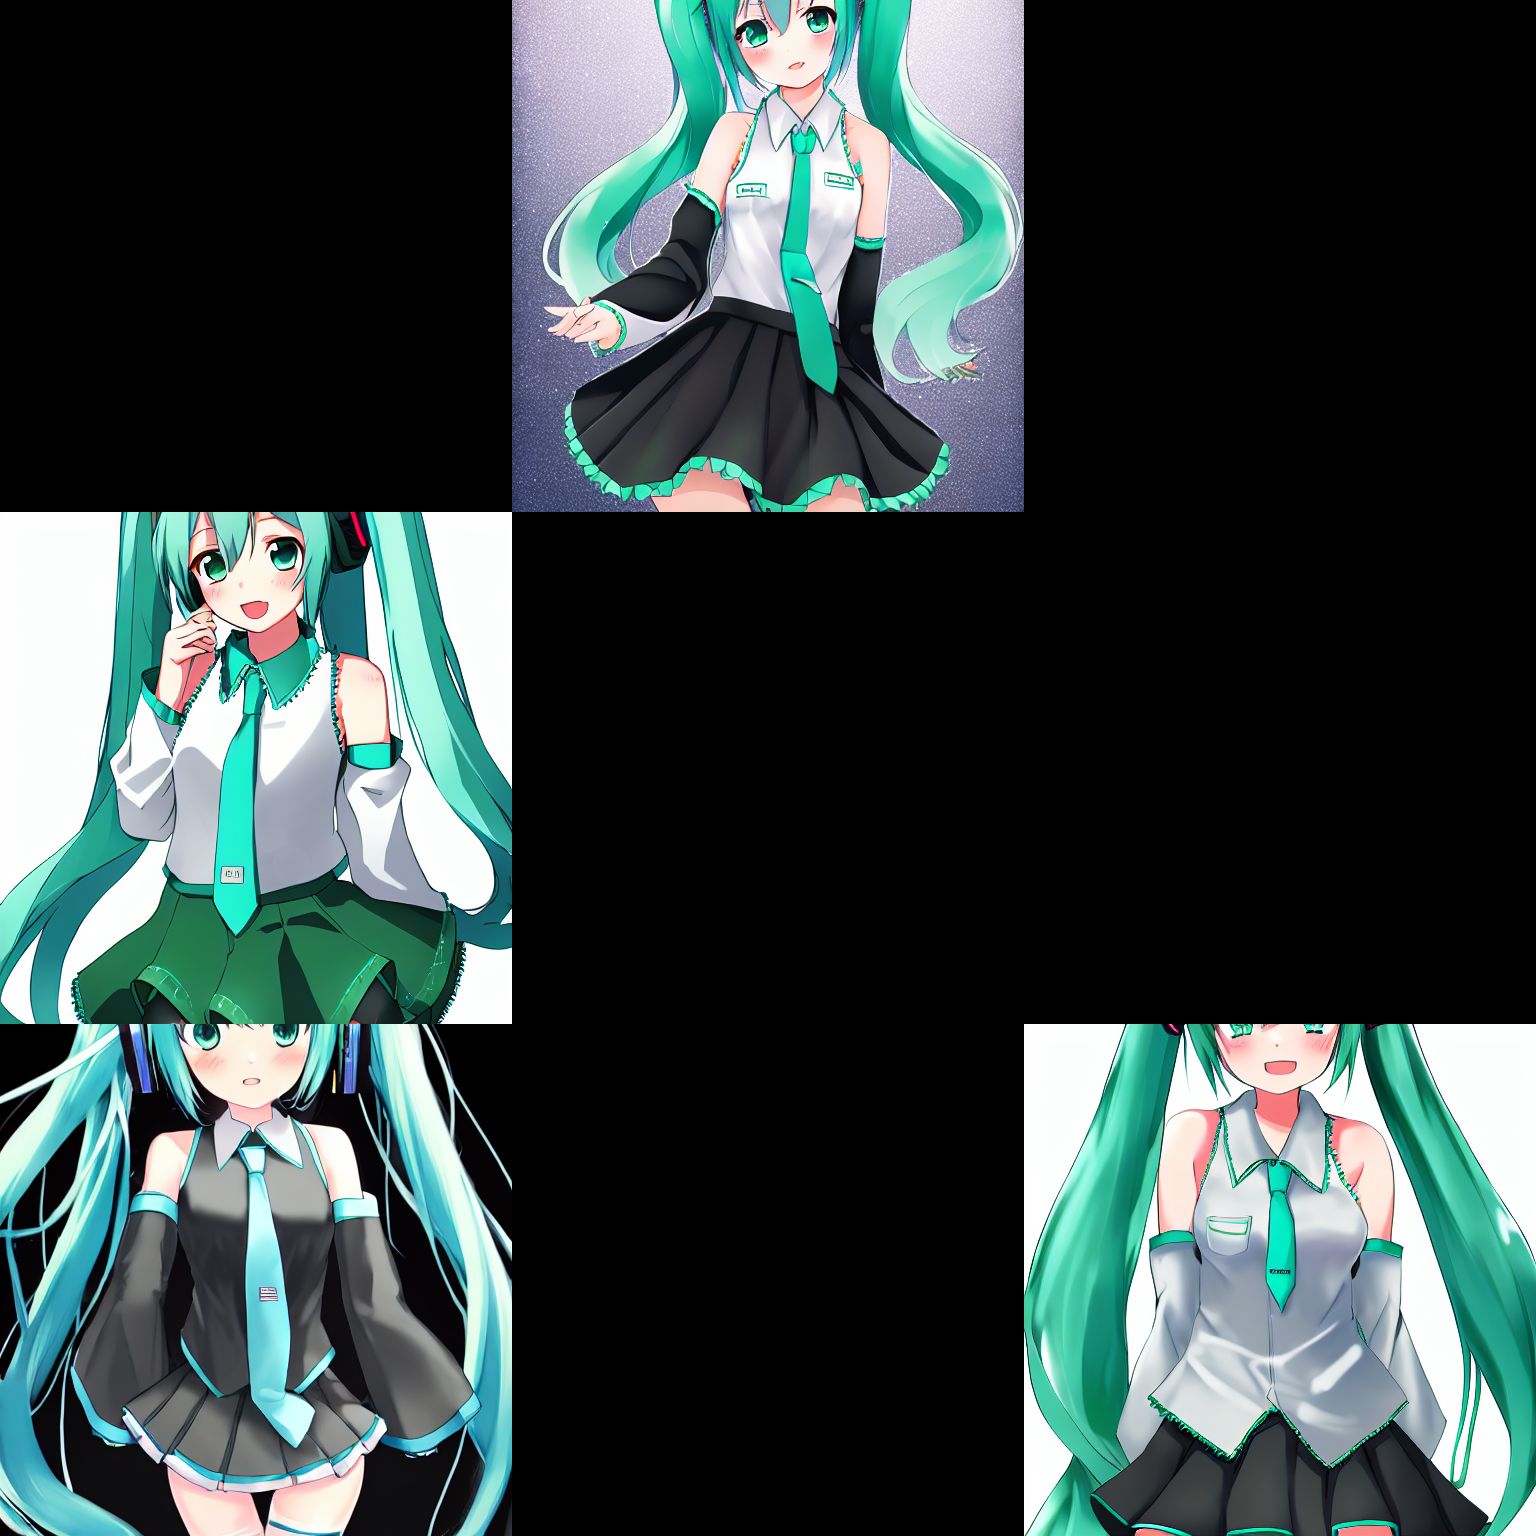

In [2]:
num_images = 3 #@param {type:"integer"}
prompt_text = "a cover illustration of beautiful drawing goddess with long silver hair odd eyes (blue, red) posing with a painting brush and b\xE9ret in a cyber space, looking up the camera, emotional, dramatic lighting, very colorful, high contrasthigh detail, high quarity, trending on Game Developer, style by alfons mucha" #@param {type:"string"}
# prompt_text = "1girl blush cowboy_shot detached_sleeves green_eyes green_hair hatsune_miku headset long_hair looking_at_viewer matching_hair/eyes necktie nekono_rin simple_background skirt solo thighhighs twintails v very_long_hair vocaloid white_background" #@param {type:"string"}
prompt = [prompt_text] * num_images
steps = 150

# 3回同じ処理をしてメモリー制限を回避している
with autocast("cuda"):
  images = pipe(prompt, num_inference_steps=steps)["sample"]
with autocast("cuda"):
  images.extend(pipe(prompt, num_inference_steps=steps)["sample"])
with autocast("cuda"):
  images.extend(pipe(prompt, num_inference_steps=steps)["sample"])
ulid = ULID()
file_name = str(ulid)
file_path = "/content/gdrive/MyDrive/Colab/WaifuDiffusion/"  #@param {type:"string"}

# よくできた画像の呪文を忘れないようにファイル出力して表示する
with open(file_path + file_name + '.txt', 'w') as f:
  f.write(prompt_text)

# 3 x 3 の画像を出力する
grid = image_grid(images, rows=3, cols=3)
grid.save(file_path + file_name + '.png')

# 作製された9枚の画像を一つずつ出力する
i = 1
for image in images:
  image.save(file_path + file_name + '_' + str(i) + '.png')
  i = i + 1
grid